# Resume Selection

### STEP 1: IMPORTING LIBRARIES

In [2]:
# INSTALLING NLTK, GENSIM AND WORDCLOUD

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing WordCloud and STOPWORDS from wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Importing NLTK libraries
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing Gensim libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Importing classification report and confusion matrix from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")


### STEP 2: LOADING THE DATASET

In [3]:
resume_df = pd.read_csv('resume_data.csv', encoding = 'latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [4]:
resume_df = resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


### STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS:

In [5]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [6]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [7]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


### STEP 4: PERFORMING DATA CLEANING:

In [8]:
# PREPROCESSING TEXT DATA AND REMOVING UNNECESSARY WORDS FROM DATASET

# Removing carriage returns ('\r') from resume_text column
resume_df['resume_text'] = resume_df['resume_text'].str.replace('\r', '')

# Importing stopwords from NLTK corpus
from nltk.corpus import stopwords

# Downloading NLTK stopwords data
nltk.download('stopwords')

# Adding additional custom stopwords to the list
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

# Defining preprocessing function
def preprocess(text):
    result = []
    # Tokenizing and filtering tokens using Gensim simple_preprocess
    for token in gensim.utils.simple_preprocess(text):
        # Filtering out tokens based on Gensim STOPWORDS and custom stop words list
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)


[nltk_data] Downloading package stopwords to C:\Users\DEBANIK
[nltk_data]     DEB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
resume_df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [10]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [11]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

In [23]:
resume_df['cleaned'][1]

'engineer scientist ibm albert gregoritsch ecawork scientistibm division june process equipment engineering multiple lines including multiple bake processeso leaded lead free solder reflowo thermal cycling wrote specifications procured capital equipment purchases upgrades project management equipment installation equipment upgrades developed methods acquiring tracking critical data metrics drove production efficiency gains data driven decision making implemented maintained lean manufacturing initiatives root cause analysis structured problem solvingo continuous improvement activitieso standard work job breakdown sheets utilized statistical process controls critical process indicators worked cross functional teams implement communicate changes improved process flow reduced cycle time waste elimination identified opportunities drove implementation technical improvements current manufacturing processes procedures oversight implementation multiple complex projects simultaneously responsibl

### STEP 5: VISUALIZING CLEANED DATASETS

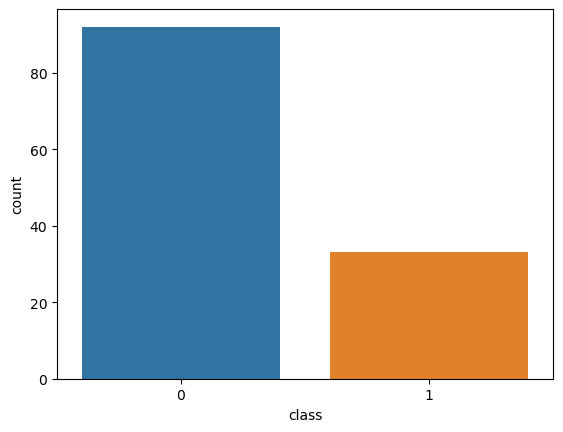

In [12]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(resume_df['class'], label = 'Count Plot')
plt.show()

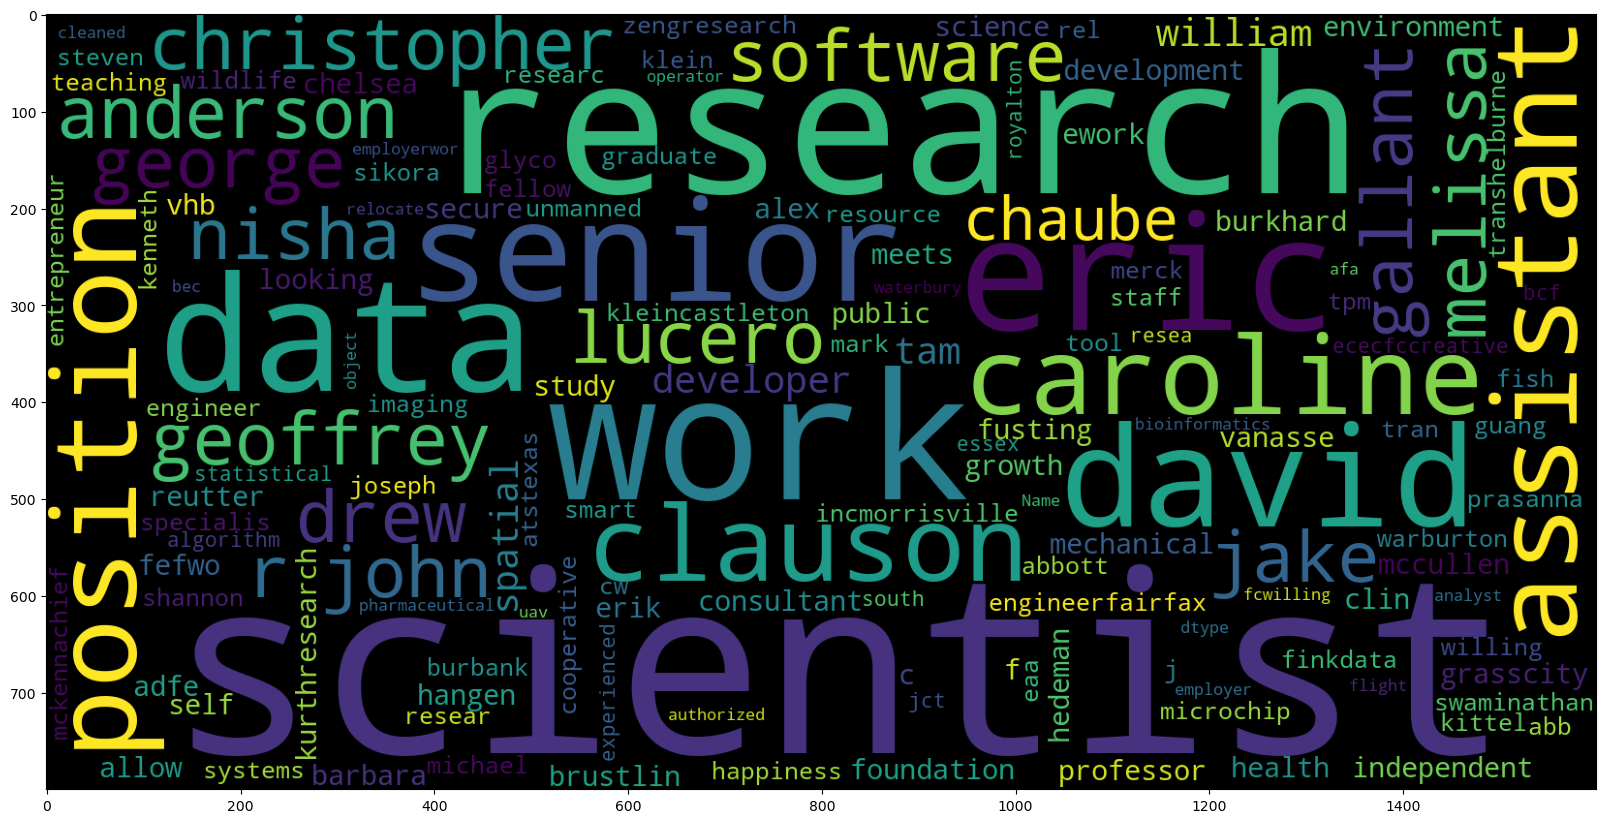

In [24]:
# PLOTTING THE WORDCLOUD:

# 1) FOR CLASS 1:


# PLOTTING THE WORDCLOUD FOR CLASS 1:


# Setting figure size
plt.figure(figsize=(20, 20))

# Generating WordCloud for class 1
wc_class1 = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

# Displaying the WordCloud
plt.imshow(wc_class1)


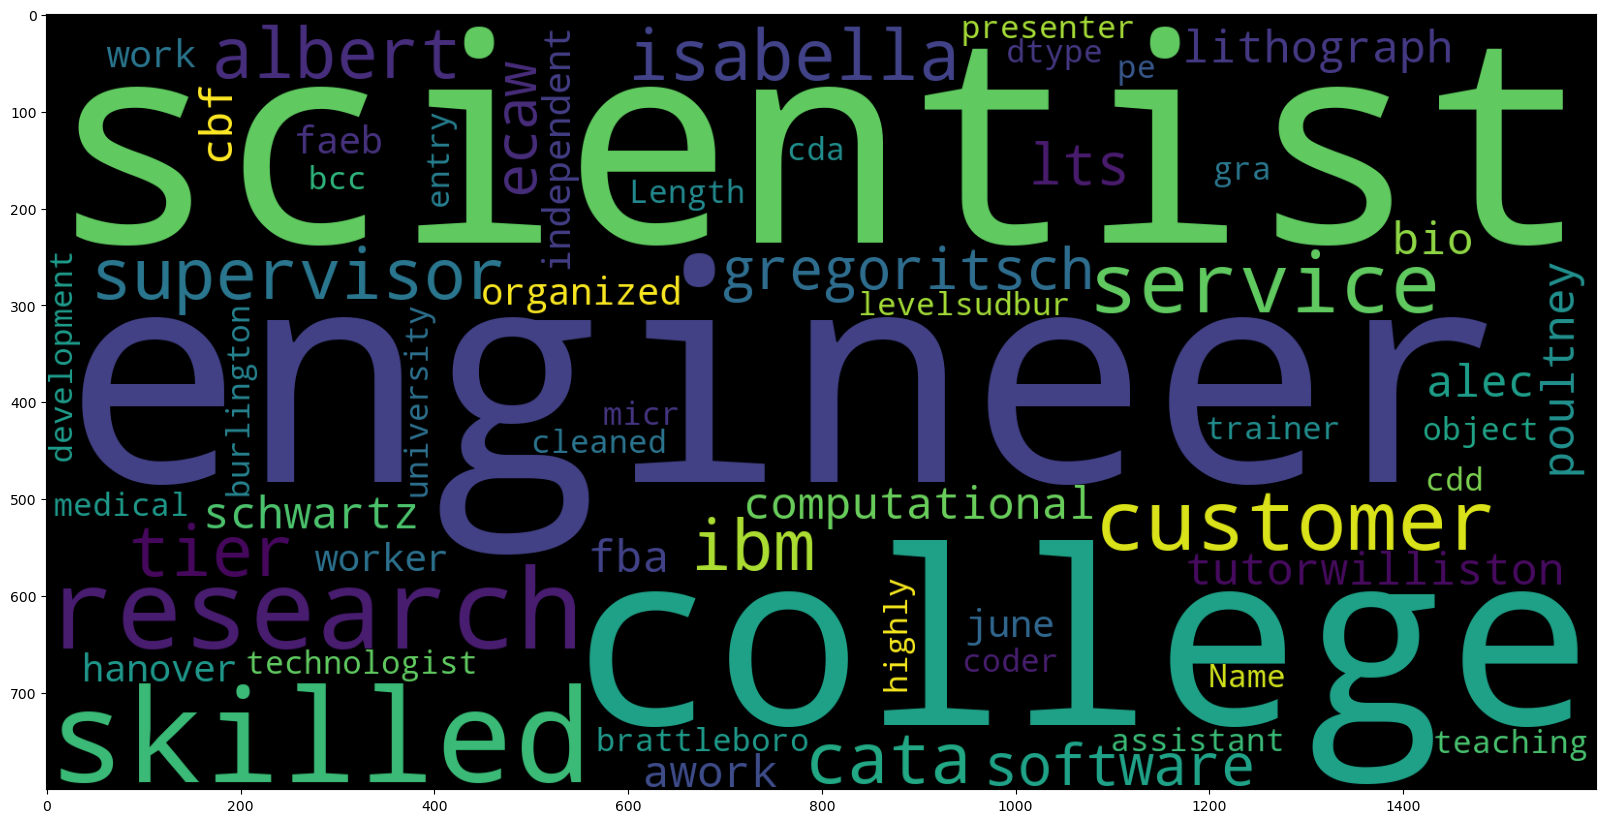

In [25]:
#1) FOR CLASS 0:


# PLOTTING THE WORDCLOUD FOR CLASS 0:


# Setting figure size
plt.figure(figsize=(20, 20))

# Generating WordCloud for class 0
wc_class0 = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

# Displaying the WordCloud
plt.imshow(wc_class0)


### STEP 6: PREPARING THE DATA BY APPLYING COUNT VECTORIZATION

In [26]:
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES FOR MODEL TRAINING:

# Importing CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating CountVectorizer
vectorizer = CountVectorizer()

# Tokenizing and converting sentences to numerical values
count_vectorized = vectorizer.fit_transform(resume_df['cleaned'])

# Printing the feature names (tokens)
print(vectorizer.get_feature_names())


['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

In [29]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### STEP 7: TRAINING A NAIVE BAYES CLASSIFER

In [28]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = count_vectorized
y = resume_df['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Importing Multinomial Naive Bayes from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB

# Instantiating Multinomial Naive Bayes classifier
Bayes_clf = MultinomialNB(alpha=3)

# Training the model
Bayes_clf.fit(X_train, y_train)


MultinomialNB(alpha=3)

### STEP 8: ASSESING THE TRAINED MODEL

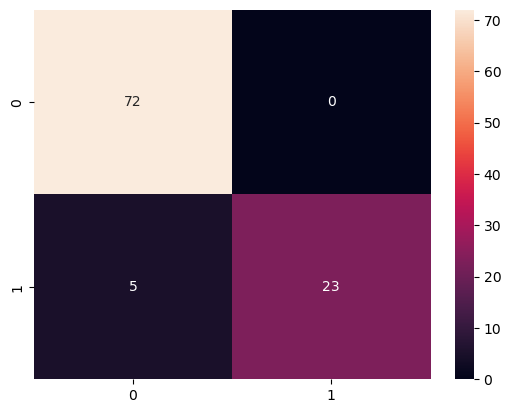

In [30]:


# PLOTTING CONFUSION MATRIX:

# 1) FOR TRAINING DATA

y_pred_train = Bayes_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

plt.show()

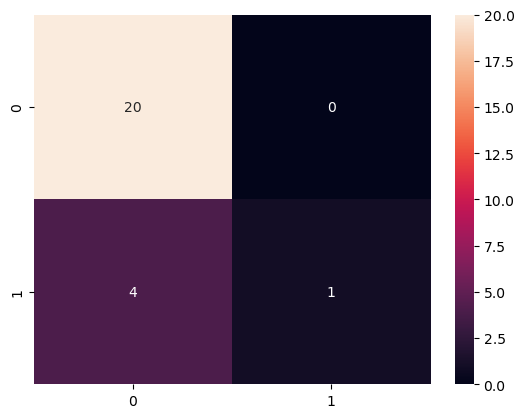

In [31]:

# WE CAN SEE OUR MODEL PERFORMED REALLY WELL ON TRAINING DATA: IT CLASSFIED ALL OF THE POINTS CORRECTLY

# 2) FOR TEST DATA:

y_pred_test = Bayes_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.20      0.33         5

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of model on Train Dataset = 0.95
Accuracy of model on Test Dataset = 0.84


In [34]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.84
F1 of model is = 0.33333333333333337
Precision of model is = 1.0
Recall of model is = 0.2


# Conclusion

* The Accuracy of the Naive Bayes Classifier model is 0.84
* The Precision of the model is 1.0
* The classifier does accurate resume selection using Naive Bayes.